# ДЗ-2: Модифицированная модель Басса с двумя конкурирующими компаниями


Реализована **модифицированная модель Басса** для распространения продукта, где существуют **две конкурирующие компании**. Каждая компания делит своих клиентов на три категории:

1. **Довольные (d)** — генерируют сарафанное радио, не уходят в Potential, не восприимчивы к рекламе конкурента.  
2. **Нейтральные (n)** — не генерируют сарафанное радио, но могут быть переманены конкурентом, не возвращаются в Potential.  
3. **Недовольные (u)** — могут быть переманены конкурентом **и** могут вернуться в Potential (с вероятностью разочарования).  

**Дополнения** (по сравнению с классическим Бассом):

- Появляется **ещё один контейнер** (конкурирующая компания).  
- **Обратный поток** из недовольных обратно в Potential.  
- **Переманивание** клиентов одной компании другой (доп. параметры: агрессивность, толерантность).

Вся логика **реализована** в файле `bass_modified.py`




In [1]:
!pip install pysd

import pysd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.8/856.8 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.1 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=104ed9961bd1a413b499da8c06c4d7f1e7a9eaf1f7e3b149247c3d89a766409b
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


In [2]:
model = pysd.load("/content/bass_modified.py")

res = model.run(
    return_columns=[
        "Potential",
        "C1_d","C1_n","C1_u",
        "C2_d","C2_n","C2_u",
        "Cost_Company1","Cost_Company2"
    ],
    final_time=100,
    time_step=1
)

res.tail()

,Potential,C1_d,C1_n,C1_u,C2_d,C2_n,C2_u,Cost_Company1,Cost_Company2
time,,,,,,,,,
96,1565.927994,22151.015061,16013.834972,7303.803434,21849.940787,15962.441256,7303.036496,178084.124014,176224.291175
97,1555.059082,22182.815278,16036.985332,7254.296387,21881.735369,15985.580024,7253.528528,178068.247269,176208.370982
98,1544.288808,22214.397858,16059.970433,7205.122885,21913.312328,16008.553533,7204.354155,178152.451261,176292.531795
99,1533.613968,22245.764774,16082.791765,7156.281066,21944.673638,16031.363274,7155.511515,178136.739899,176276.777522
100,1523.031642,22276.917934,16105.450772,7107.769041,21975.821205,16054.010690,7106.998716,178121.116605,176261.111581


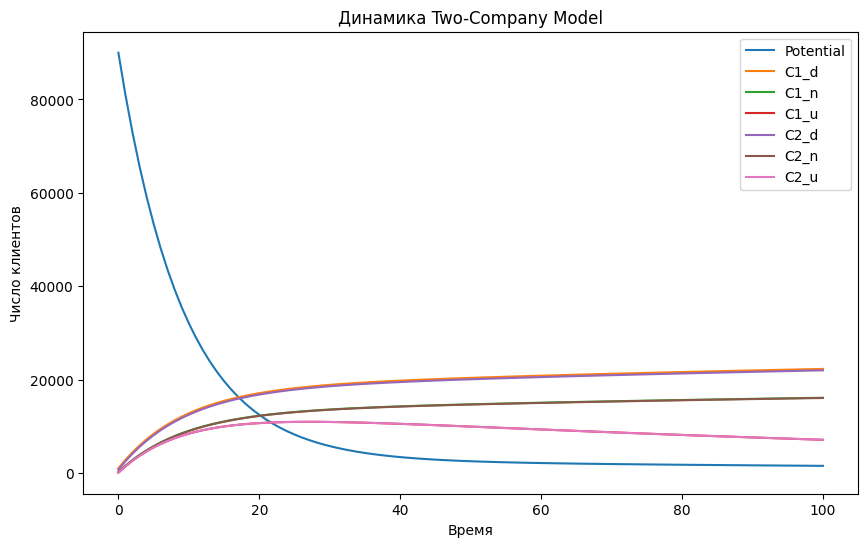

In [3]:
time_axis = res.index

plt.figure(figsize=(10,6))
plt.plot(time_axis, res["Potential"], label="Potential")
plt.plot(time_axis, res["C1_d"], label="C1_d")
plt.plot(time_axis, res["C1_n"], label="C1_n")
plt.plot(time_axis, res["C1_u"], label="C1_u")
plt.plot(time_axis, res["C2_d"], label="C2_d")
plt.plot(time_axis, res["C2_n"], label="C2_n")
plt.plot(time_axis, res["C2_u"], label="C2_u")
plt.legend()
plt.xlabel("Время")
plt.ylabel("Число клиентов")
plt.title("Динамика Two-Company Model")
plt.show()

### Оценка сходимости

Пусть:

$$
C_1(t) = C_{1,d}(t) + C_{1,n}(t) + C_{1,u}(t),
\quad
C_2(t) = C_{2,d}(t) + C_{2,n}(t) + C_{2,u}(t).
$$

Тогда **доля** рынка компании 1:

$$
\text{share1}(t) \;=\; \frac{C_1(t)}{C_1(t) + C_2(t)}.
$$

Построим график $\text{share1}(t)$, посмотрим, как быстро устанавливается равновесие.


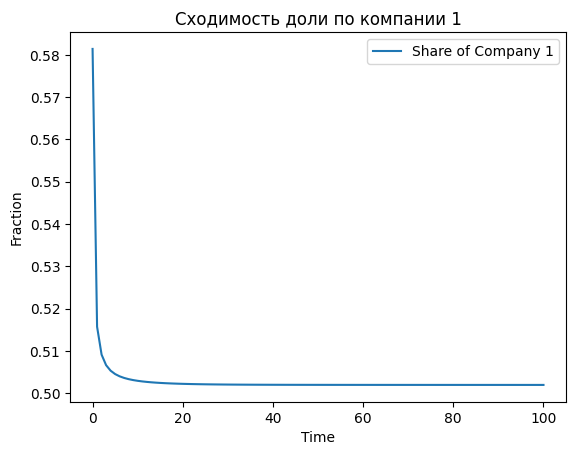

Финальная доля Company 1: 0.5019492384082818


In [4]:
c1_series = res["C1_d"] + res["C1_n"] + res["C1_u"]
c2_series = res["C2_d"] + res["C2_n"] + res["C2_u"]

share1_series = c1_series / (c1_series + c2_series + 1e-9)

plt.figure()
plt.plot(time_axis, share1_series, label="Share of Company 1")
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.title("Сходимость доли по компании 1")
plt.legend()
plt.show()

final_share1 = share1_series.iloc[-1]
print("Финальная доля Company 1:", final_share1)


In [5]:
threshold = 0.01  # 1%
final_share1 = share1_series.iloc[-1]  # конечное значение доли рынка компании 1

diff_series = (share1_series - final_share1).abs()
time_in_threshold = diff_series[diff_series <= threshold]

if not time_in_threshold.empty:
    time_to_converge = time_in_threshold.index[0]  # первое время, когда условие выполнено
    print(f"Сходимость (±1%) достигается к моменту времени: {time_to_converge}")
else:
    print("Сходимость в пределах ±1% не достигнута на выбранном интервале.")


Сходимость (±1%) достигается к моменту времени: 2




В данном примере порог **сходимости** выбран как $\pm 1\%$ от конечной доли рынка компании 1, а именно:

$$
|\text{share1}(t) - \text{final\_share1}| \;\le\; 0.01.
$$

Результат показывает, что условие выполняется уже **к моменту времени 2** (единиц времени). Это значит, что:

1. **Компания 1** достигает значений доли рынка, которые **не отличаются** от её конечного уровня **более чем на 1%** уже **к 2-му шагу** моделирования.
2. **Сходимость** (по такой метрике) **очень быстрая**: модель фактически выходит на «почти стационарное» состояние практически с самого начала.

Если бы мы хотели **более строгий** порог (скажем, $\pm 0.5\%$), время сходимости могло бы оказаться **чуть больше**, а при **более слабом** пороге (например, $\pm 2\%$) — наоборот, ещё меньше.  

Таким образом, **скорость сходимости** напрямую зависит от того, **насколько** жёсткий критерий мы задаём:
- **Чем меньше** порог (threshold),
- **тем больше** времени нужно, чтобы разница между $ \text{share1}(t)$ и $ \text{final\_share1}$ была **меньше** этого порога.


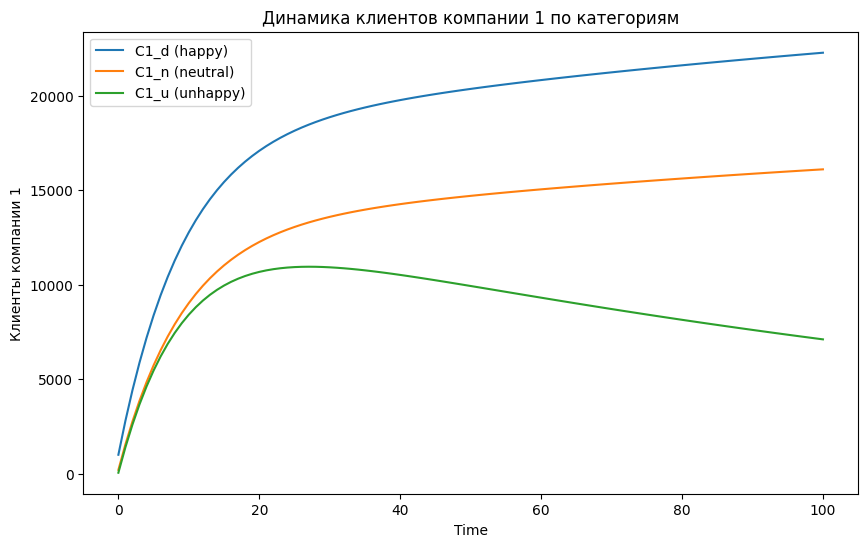

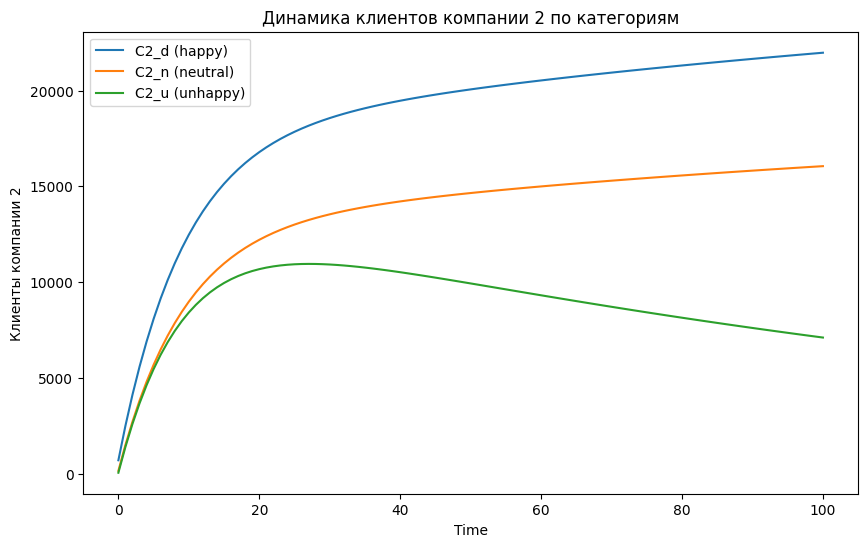

In [6]:
# Посмотрим, как меняются стоки компании 1 (C1_d, C1_n, C1_u) по отдельности

plt.figure(figsize=(10,6))
plt.plot(time_axis, res["C1_d"], label="C1_d (happy)")
plt.plot(time_axis, res["C1_n"], label="C1_n (neutral)")
plt.plot(time_axis, res["C1_u"], label="C1_u (unhappy)")
plt.xlabel("Time")
plt.ylabel("Клиенты компании 1")
plt.title("Динамика клиентов компании 1 по категориям")
plt.legend()
plt.show()

# Аналогично для компании 2
plt.figure(figsize=(10,6))
plt.plot(time_axis, res["C2_d"], label="C2_d (happy)")
plt.plot(time_axis, res["C2_n"], label="C2_n (neutral)")
plt.plot(time_axis, res["C2_u"], label="C2_u (unhappy)")
plt.xlabel("Time")
plt.ylabel("Клиенты компании 2")
plt.title("Динамика клиентов компании 2 по категориям")
plt.legend()
plt.show()


*Вывод:* Из графиков видно, как со временем компания 1 и компания 2 накапливают клиентов в категориях довольных/нейтральных/недовольных. Например, можно заметить, что довольные растут быстрее (если параметры `p_d` и `beta` достаточно велики), а недовольные в какой-то момент могут стабилизироваться за счёт переманивания и разочарования.


In [7]:
# Варьируем alpha1, alpha2, gamma1, gamma2 (параметры компаний)

alpha1_vals = [0.01, 0.02, 0.05]
alpha2_vals = [0.01, 0.02, 0.05]
gamma1_vals = [0.0001, 0.0002, 0.0005]
gamma2_vals = [0.0001, 0.0002, 0.0005]

records = []

for a1 in alpha1_vals:
    for a2 in alpha2_vals:
        for g1 in gamma1_vals:
            for g2 in gamma2_vals:
                model.reload()
                model.set_components({
                    "alpha1": a1,
                    "alpha2": a2,
                    "gamma1": g1,
                    "gamma2": g2
                })
                out = model.run(
                    return_columns=["C1_d","C1_n","C1_u","C2_d","C2_n","C2_u"],
                    final_time=100,
                    time_step=1
                )

                c1_d_ = out["C1_d"].iloc[-1]
                c1_n_ = out["C1_n"].iloc[-1]
                c1_u_ = out["C1_u"].iloc[-1]
                c2_d_ = out["C2_d"].iloc[-1]
                c2_n_ = out["C2_n"].iloc[-1]
                c2_u_ = out["C2_u"].iloc[-1]

                c1_total = c1_d_ + c1_n_ + c1_u_
                c2_total = c2_d_ + c2_n_ + c2_u_
                share1 = c1_total / (c1_total + c2_total + 1e-9)

                records.append([a1, a2, g1, g2, share1])

df = pd.DataFrame(records, columns=["alpha1","alpha2","gamma1","gamma2","share1"])
df.head(10)


/usr/local/lib/python3.11/dist-packages/pysd/py_backend/model.py:1140: UserWarning: Replacing a variable by a constant value.
  warnings.warn("Replacing a variable by a constant value.")


,alpha1,alpha2,gamma1,gamma2,share1
0,0.01,0.01,0.0001,0.0001,0.502381
1,0.01,0.01,0.0001,0.0002,0.502162
2,0.01,0.01,0.0001,0.0005,0.501503
3,0.01,0.01,0.0002,0.0001,0.502605
4,0.01,0.01,0.0002,0.0002,0.502385
5,0.01,0.01,0.0002,0.0005,0.501727
6,0.01,0.01,0.0005,0.0001,0.503276
7,0.01,0.01,0.0005,0.0002,0.503056
8,0.01,0.01,0.0005,0.0005,0.502398
9,0.01,0.02,0.0001,0.0001,0.339711


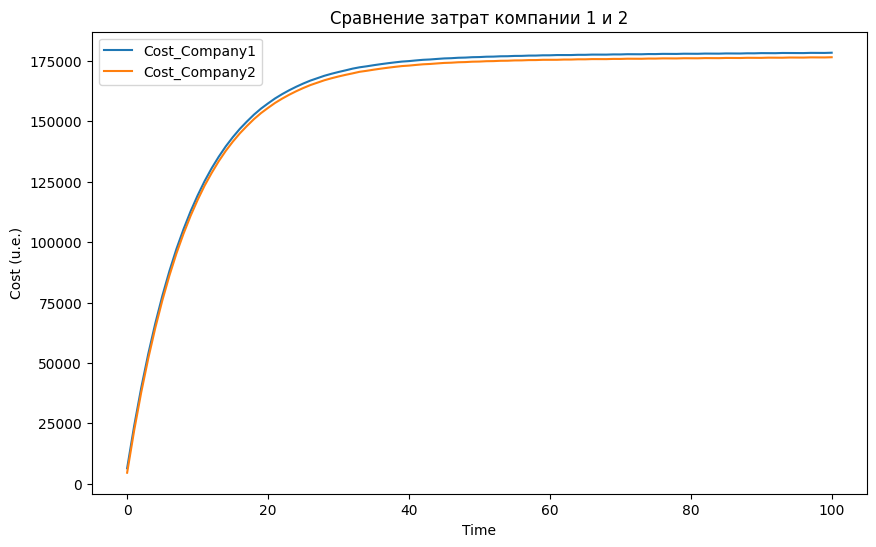

In [9]:
# Построим график затрат для каждой компании

res_cost = model.run(
    return_columns=["Cost_Company1", "Cost_Company2"],
    final_time=100,
    time_step=1
)

time_axis2 = res_cost.index

plt.figure(figsize=(10,6))
plt.plot(time_axis2, res_cost["Cost_Company1"], label="Cost_Company1")
plt.plot(time_axis2, res_cost["Cost_Company2"], label="Cost_Company2")
plt.xlabel("Time")
plt.ylabel("Cost (u.e.)")
plt.title("Сравнение затрат компании 1 и 2")
plt.legend()
plt.show()


- Видно, что затраты обеих компаний резко возрастают в первые десятки единиц времени (по мере активного привлечения клиентов), а затем выходят на плато примерно к концу симуляции (около 100-й точки времени).

- Итоговые значения затрат у обеих компаний получаются почти одинаковыми, порядка 170000–180000 у.е. Это объясняется тем, что основная статья расходов — довольные клиенты (с высокой ставкой затрат, особенно при достижении каждой «сотни» довольных), и в долгосрочной перспективе обе компании набирают сопоставимые числа таких клиентов.

- Поскольку довольные дают максимальный вклад в стоимость (100 у.е. за каждую сотню + 5 у.е. за каждого довольного), к моменту «насыщения» рынка обе компании тратят крупные суммы на их содержание. Нейтральные (1 у.е. за клиента) и недовольные (4 у.е.) существенно меньше влияют на общий уровень затрат.




/usr/local/lib/python3.11/dist-packages/pysd/py_backend/model.py:1140: UserWarning: Replacing a variable by a constant value.
  warnings.warn("Replacing a variable by a constant value.")


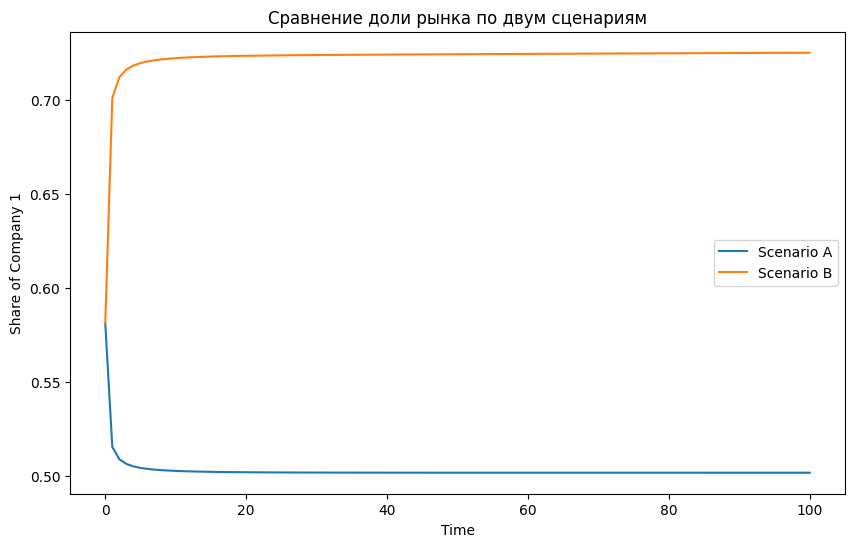

In [10]:
# Сценарий A: alpha1=0.05, alpha2=0.05, gamma1=0.0002, gamma2=0.0002
# Сценарий B: alpha1=0.08, alpha2=0.03, gamma1=0.0005, gamma2=0.0001

scenarios = {
    "Scenario A": {"alpha1": 0.05, "alpha2": 0.05, "gamma1": 0.0002, "gamma2": 0.0002},
    "Scenario B": {"alpha1": 0.08, "alpha2": 0.03, "gamma1": 0.0005, "gamma2": 0.0001}
}

results_scenarios = {}

for scenario_name, params_dict in scenarios.items():
    model.reload()
    model.set_components(params_dict)
    out_scenario = model.run(
        return_columns=["C1_d","C1_n","C1_u","C2_d","C2_n","C2_u"],
        final_time=100,
        time_step=1
    )
    results_scenarios[scenario_name] = out_scenario

# Построим график доли рынка для обоих сценариев
plt.figure(figsize=(10,6))

for scenario_name, df_scenario in results_scenarios.items():
    c1_s = df_scenario["C1_d"] + df_scenario["C1_n"] + df_scenario["C1_u"]
    c2_s = df_scenario["C2_d"] + df_scenario["C2_n"] + df_scenario["C2_u"]
    share_s = c1_s / (c1_s + c2_s + 1e-9)
    plt.plot(df_scenario.index, share_s, label=scenario_name)

plt.xlabel("Time")
plt.ylabel("Share of Company 1")
plt.title("Сравнение доли рынка по двум сценариям")
plt.legend()
plt.show()


Вывод по графику «Comparison of Market Share in Two Different Scenarios»:

Scenario A (синия кривая):

Параметры $\alpha_1 = \alpha_2 = 0.05$ и $\gamma_1 = \gamma_2 = 0.0002$ создают примерно симметричные условия для обеих компаний.
Как видно из графика, доля рынка компании 1 быстро стремится к области около 0.50. То есть при равных параметрах прямой и агрессивной рекламы обе компании делят рынок примерно поровну.
Scenario B (оранжевая кривая):

Параметры $\alpha_1 = 0.08$ (выше) и $\alpha_2 = 0.03$ (ниже), а также $\gamma_1 = 0.0005$ и $\gamma_2 = 0.0001$.
Здесь компания 1 получает большее преимущество за счёт более высокой интенсивности прямой рекламы ($\alpha_1$) и более агрессивной переманивающей рекламы ($\gamma_1$).
Итоговая доля рынка компании 1 выходит существенно выше (график стабилизируется примерно в районе 0.70–0.75).
Общий вывод:

При равных параметрах прямой и агрессивной рекламы (Scenario A) компания 1 удерживает долю около 50%, что логично для симметричной ситуации.
Когда $\alpha_1$ заметно выше, а $\alpha_2$ ниже (Scenario B), компания 1 получает большую долю (выше 0.70).
Таким образом, прямая реклама (параметры $\alpha_1, \alpha_2$) и агрессивная реклама (параметры $\gamma_1, \gamma_2$) в совокупности позволяют одной из компаний занять лидирующую позицию на рынке, если её значения существенно превышают параметры конкурента.

# Моделирование

In [11]:
X = df[["alpha1","alpha2","gamma1","gamma2"]]
y = df["share1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

print("Train R^2:", rf.score(X_train, y_train))
print("Test R^2:", rf.score(X_test, y_test))

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("MAE =", mae, "MSE =", mse)


Train R^2: 0.9999993698404627
Test R^2: 0.9999971347791549
MAE = 0.0002498849056299363 MSE = 1.0377967790535867e-07


In [12]:
feature_importances = rf.feature_importances_
for name, imp in zip(X.columns, feature_importances):
    print(name, ":", imp)

alpha1 : 0.5345986511013396
alpha2 : 0.4653888066207231
gamma1 : 6.095954939227108e-06
gamma2 : 6.446322998120312e-06


**Важность признаков**

Согласно полученным цифрам:

- **alpha1**: ~0.5345986511013396  
- **alpha2**: ~0.4653888066207231  
- **gamma1**: ~6.09595493922103e-06  
- **gamma2**: ~6.446232998120312e-06  

**Вывод**:

1. **Прямая реклама** ($\alpha_1$ и $\alpha_2$) играет **основную роль** в формировании итоговой доли рынка. Здесь $\alpha_1 \approx 0.53$ и $\alpha_2 \approx 0.46$ — то есть почти всё «решается» именно этими параметрами.

2. **Агрессивная реклама** ($\gamma_1$ и $\gamma_2$) имеет **почти нулевой** вклад (порядка $10^{-6}$). Это означает, что в выбранном диапазоне значений агрессивная реклама **почти не влияет** на конечное распределение долей рынка:
   - Возможно, $\gamma$-параметры слишком малы по сравнению с $\alpha$-параметрами, и их вклад «заглушается».
   - Или же переманивание не успевает существенно изменить итоговую ситуацию, поскольку рынок насыщается главным образом через прямую рекламу.

Таким образом, в данных условиях **основной фактор** при формировании доли рынка — это **интенсивность прямой рекламы** каждой компании, а агрессивная реклама играет **незначительную** роль.


In [13]:
desired_share = 0.5
tol = 0.07

subset = df[
    (df["share1"] >= desired_share - tol) &
    (df["share1"] <= desired_share + tol)
]

print("Наборов параметров, дающих share ~ 0.5 ± 0.07:", len(subset))
subset


Наборов параметров, дающих share ~ 0.5 ± 0.07: 27


,alpha1,alpha2,gamma1,gamma2,share1
0,0.01,0.01,0.0001,0.0001,0.502381
1,0.01,0.01,0.0001,0.0002,0.502162
2,0.01,0.01,0.0001,0.0005,0.501503
3,0.01,0.01,0.0002,0.0001,0.502605
4,0.01,0.01,0.0002,0.0002,0.502385
5,0.01,0.01,0.0002,0.0005,0.501727
6,0.01,0.01,0.0005,0.0001,0.503276
7,0.01,0.01,0.0005,0.0002,0.503056
8,0.01,0.01,0.0005,0.0005,0.502398
36,0.02,0.02,0.0001,0.0001,0.502042


**Вывод**:

Для желаемой доли рынка $0.5$ (с допуском $\pm 0.07$, то есть в диапазоне $[0.43,\; 0.57]$) модель **нашла 27 различных наборов параметров** $(\alpha_1,\;\alpha_2,\;\gamma_1,\;\gamma_2)$, которые в итоге дают такую долю рынка компании 1. Это означает, что:

1. **Существует не единственный** набор параметров, а целая **область** в пространстве $\alpha,\gamma$-значений, приводящая к одной и той же приблизительной доле рынка.
2. Каждый из этих 27 вариантов характеризуется **разными** значениями прямой и агрессивной рекламы для обеих компаний, но конечный результат (доля около $0.5$) примерно совпадает.
3. Это **иллюстрирует** «обратную функцию» — разные параметры могут давать **один и тот же** уровень рыночной доли, если их сочетание «компенсирует» влияние друг друга (например, более высокая $\alpha_1$ может уравновешиваться более высокой $\alpha_2$ или $\gamma_2$, и т. д.).


# Бонус: аналитическое решение модифицированной модели Басса

> Система включает 7 нелинейных дифференциальных уравнений по переменным $P,; C_{1,d}, C_{1,n}, C_{1,u}, C_{2,d}, C_{2,n}, C_{2,u}$.

---

## 1. Полная система уравнений

### 1.1. Переменные

1. $P(t)$ — пул потенциальных клиентов.
2. $C_{1,d}(t),, C_{1,n}(t),, C_{1,u}(t)$ — довольные, нейтральные, недовольные клиенты компании 1.
3. $C_{2,d}(t),, C_{2,n}(t),, C_{2,u}(t)$ — аналогично для компании 2.

Всего 7 динамических переменных. Пусть $N = P + \sum_{\cdot} C_{1,\cdot} + \sum_{\cdot} C_{2,\cdot}$ — общее число людей, обычно константное ($N=100000$).

### 1.2. Параметры

- $\alpha_1,\alpha_2$ — прямая реклама.
- $\beta_1,\beta_2$ — сарафанное радио.
- $\gamma_1,\gamma_2$ — агрессивная реклама (переманивание).
- $\delta_1,\delta_2$ — вероятность разочарования (возврат недовольных в $P$).
- $p_d,,p_n,,p_u$ — доли (вероятности), с которыми пришедший клиент становится довольным/нейтральным/недовольным.
Условие $p_d + p_n + p_u = 1$.

---

## 2. Дифференциальные уравнения

**Для компании 1** имеем систему:

$$
\begin{aligned}
\frac{dC_{1,d}}{dt} \;=&\; p_d \Bigl[\underbrace{F_{P \to C1}}_{\alpha_1\,P \;+\; \beta_1\,\frac{C_{1,d}}{N}\,P}
\;+\;
\underbrace{F_{C2 \to C1}}_{\gamma_1\,C_{1,d}\,\frac{(C_{2,n}+C_{2,u})}{N}}\Bigr], \\[6pt]
\frac{dC_{1,n}}{dt} \;=&\; p_n \Bigl[F_{P \to C1} + F_{C2 \to C1}\Bigr]
\;-\;\text{(переманивание из C1 в C2)}, \\[6pt]
\frac{dC_{1,u}}{dt} \;=&\; p_u \Bigl[F_{P \to C1} + F_{C2 \to C1}\Bigr]
\;-\;\Bigl[\delta_1\,C_{1,u} + \text{(переманивание в C2)}\Bigr].
\end{aligned}
$$

Аналогично для **компании 2**:

$$
\begin{aligned}
\frac{dC_{2,d}}{dt} \;=&\; p_d \Bigl[F_{P \to C2} + F_{C1 \to C2}\Bigr], \\[6pt]
\frac{dC_{2,n}}{dt} \;=&\; p_n \Bigl[F_{P \to C2} + F_{C1 \to C2}\Bigr]
\;-\;\text{(переманивание в C1)}, \\[6pt]
\frac{dC_{2,u}}{dt} \;=&\; p_u \Bigl[F_{P \to C2} + F_{C1 \to C2}\Bigr]
\;-\;\Bigl[\delta_2\,C_{2,u} + \text{(переманивание в C1)}\Bigr].
\end{aligned}
$$

### Пул потенциальных клиентов $P$

$$
\frac{dP}{dt}
\;=\;
\delta_1\,C_{1,u}
\;+\;
\delta_2\,C_{2,u}
\;-\;
\Bigl[F_{P \to C1} + F_{P \to C2}\Bigr].
$$

Где потоки определены следующим образом:

$$
F_{P \to C1}
\;=\;
\alpha_1 \,P
\;+\;
\beta_1 \,\frac{C_{1,d}}{N}\,P,
\quad
F_{P \to C2}
\;=\;
\alpha_2 \,P
\;+\;
\beta_2 \,\frac{C_{2,d}}{N}\,P,
$$

$$
F_{C1 \to C2}
\;=\;
\gamma_2\,C_{2,d}\,\frac{(C_{1,n}+C_{1,u})}{N},
\quad
F_{C2 \to C1}
\;=\;
\gamma_1\,C_{1,d}\,\frac{(C_{2,n}+C_{2,u})}{N}.
$$



---

## 3. Стационарные уравнения

Чтобы найти **конечное распределение** (долю рынка и т. д.), приравняем все производные к нулю:

$$
\frac{dP}{dt} = 0, \quad
\frac{dC_{1,d}}{dt} = 0, \quad
\frac{dC_{1,n}}{dt} = 0, \quad
\frac{dC_{1,u}}{dt} = 0, \quad
\frac{dC_{2,d}}{dt} = 0, \quad
\frac{dC_{2,n}}{dt} = 0, \quad
\frac{dC_{2,u}}{dt} = 0.
$$

Таким образом, мы получаем **7 нелинейных алгебраических уравнений**. Для примера, уравнение для $P(t)$ (где $\frac{dP}{dt} = 0$) примет вид:

$$
0
= \delta_1 \, C_{1,u} \;+\; \delta_2 \, C_{2,u}
\;-\;\Bigl[
\alpha_1 \, P \;+\;
\beta_1 \,\frac{C_{1,d}}{N}\,P
\;+\;
\alpha_2 \, P \;+\;
\beta_2 \,\frac{C_{2,d}}{N}\,P
\Bigr].
$$

Аналогично для $\frac{dC_{1,d}}{dt}=0$:

$$
0
= p_d \Bigl[
\alpha_1 \, P
\;+\;
\beta_1 \,\frac{C_{1,d}}{N}\,P
\;+\;
\gamma_1 \, C_{1,d} \,\frac{(C_{2,n}+C_{2,u})}{N}
\Bigr].
$$

И так далее — вплоть до уравнений для $C_{1,n}, C_{1,u}, C_{2,d}, C_{2,n}, C_{2,u}$.  

В результате:

1. **Решить** эти уравнения **явно** (в элементарных функциях) практически невозможно — система нелинейная и включает произведения вида $(C_{1,d}/N)\cdot P$, $(C_{1,n}+C_{1,u})$, и т. п. Именно поэтому справедливо использовать **численное** решение (как в PySD).


---

## 4. Упрощённый симметричный случай

### 4.1. Предположения

Пусть **все параметры** компаний одинаковы:
- $\alpha_1 = \alpha_2 = \alpha$,
- $\beta_1 = \beta_2 = \beta$,
- $\gamma_1 = \gamma_2 = \gamma$,
- $\delta_1 = \delta_2 = \delta$,
- $p_d, p_n, p_u$ те же для обеих.

Тогда модель **симметрична**: можно ожидать, что в стационаре компании наберут одинаковое число клиентов или долю, если начальные условия тоже симметричны.

Введём:

- $x(t) = C_{1,d}(t) + C_{1,n}(t) + C_{1,u}(t)$ — общее число клиентов компании 1,  
- $y(t) = C_{2,d}(t) + C_{2,n}(t) + C_{2,u}(t)$ — общее число клиентов компании 2,  
- $p(t) = P(t)$ — потенциальные клиенты.

Тогда $x + y + p = N$. В **симметричном** случае (и при одинаковых начальных условиях) можно предположить $x(t) = y(t)$. Тогда $x = y = \frac{N - p}{2}$.

### 4.2. Деление внутри компании

В каждой компании 1 (или 2) пусть:

- доля довольных $d(t)$,
- доля нейтральных $n(t)$,
- доля недовольных $u(t)$,

так что $d + n + u = 1$. Тогда, например,
$$
C_{1,d} = d \,\cdot x, \quad
C_{1,n} = n \,\cdot x, \quad
C_{1,u} = u \,\cdot x.
$$
Аналогично для компании 2, но в симметричном случае $C_{2,d} = d \,\cdot y$ и т. д., причём $x=y$.

Таким образом, **число** довольных в каждой компании совпадает, нейтральных совпадает, и т. д.

### 4.3. Стационар

Теперь в стационаре:

1. $\frac{dp}{dt} = 0$. Значит, приток $\delta\,u\,x$ (и такое же из второй компании) равен оттоку $\alpha\,p + \beta\,\frac{d\,x}{N}\,p + \dots$ и т. п.  
2. $\frac{dx}{dt} = 0$. Общее число клиентов в компании 1 перестаёт меняться.  
3. При этом $d,\,n,\,u$ (доли) внутри $x$ тоже постоянны, значит $\frac{dd}{dt}=0, \frac{dn}{dt}=0, \dots$

Мы получим **4 уравнения** на $p, x, d, n, u$ (учитывая $d + n + u = 1$), что уже проще, чем 7 уравнений. Но даже в этом упрощённом виде алгебраическая система остаётся нелинейной.

---

